In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]

In [5]:
df['is_renovated'] = df["yr_renovated"].apply(lambda x: True if x != 0 else False)

C:\Users\carlo\AppData\Local\Temp\ipykernel_16956\3394126139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_renovated'] = df["yr_renovated"].apply(lambda x: True if x != 0 else False)


In [6]:
df = df.drop("yr_renovated", axis=1)

In [7]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,7,1180,0,1955,False
1,538000.0,3,2.25,2570,7242,2.0,0,0,7,2170,400,1951,True
2,180000.0,2,1.00,770,10000,1.0,0,0,6,770,0,1933,False
3,604000.0,4,3.00,1960,5000,1.0,0,0,7,1050,910,1965,False
4,510000.0,3,2.00,1680,8080,1.0,0,0,8,1680,0,1987,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,8,1530,0,2009,False
21609,400000.0,4,2.50,2310,5813,2.0,0,0,8,2310,0,2014,False
21610,402101.0,2,0.75,1020,1350,2.0,0,0,7,1020,0,2009,False
21611,400000.0,3,2.50,1600,2388,2.0,0,0,8,1600,0,2004,False


In [8]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score

In [9]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [10]:
numerical_columns = x.columns[(x.dtypes == "float64") | (x.dtypes == "int64")]
categorical_columns = x.columns[(x.dtypes == "object")]

In [11]:
col_transf = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    (StandardScaler(), numerical_columns),
    remainder="passthrough"
)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=2, test_size=0.2)

In [13]:
models = []
models.append(("RF", RandomForestRegressor()))
models.append(("DT", DecisionTreeRegressor()))

In [14]:
pipelines = {name: make_pipeline(col_transf, model) for name, model in models}

In [15]:
results = []
scoring = 'r2'
kfolds = 5

for name, pipeline in pipelines.items():
	cv_results = cross_val_score(pipeline, X_train, y_train, cv=kfolds, scoring=scoring)
	results.append({name: cv_results})

In [16]:
best_model = sorted(results, key=lambda x: list(x.values())[0].mean(), reverse=True)[0]
best_pipeline = pipelines[list(best_model.keys())[0]]

In [17]:
req = X_test.iloc[0:1]
req

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
6638,4,2.25,2410,4250,1.5,0,0,7,1460,950,1929,False


In [18]:
y_test.iloc[0]

735000.0

In [19]:
best_pipeline.fit(X_train, y_train)

c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index([], dtype='object')),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built'],
      dtype='object'))])),
                ('randomforestregressor', RandomForestRegressor())])

In [20]:
best_pipeline.predict(req)

array([686222.7])

In [21]:
!pip install shap

   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------- 30.7/544.4 kB 1.3 MB/s eta 0:00:01
   ------ --------------------------------- 92.2/544.4 kB 1.3 MB/s eta 0:00:01
   ---------------- ----------------------- 225.3/544.4 kB 2.0 MB/s eta 0:00:01
   ---------------------------------- ----- 471.0/544.4 kB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 544.4/544.4 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB ? eta -:--:--
   -------------------- ------------------- 1.5/2.8 MB 18.7 MB/s eta 0:00:01
   ------------------------------- -------- 2.3/2.8 MB 20.4 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 17.9 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 18.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   - ----------

In [22]:
import shap

In [23]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
6638,4,2.25,2410,4250,1.5,0,0,7,1460,950,1929,False
7366,3,1.50,2170,16600,1.0,1,2,10,1130,1040,1979,False
3158,2,1.00,1450,6380,1.0,0,0,7,1450,0,1967,False
9117,5,3.25,4500,9648,2.0,0,4,8,3000,1500,1968,False
3392,2,1.00,860,6000,1.0,0,0,6,860,0,1945,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8494,4,1.75,1530,8152,1.0,0,0,6,910,620,1948,False
5359,3,1.75,1580,9187,1.0,0,0,8,1180,400,1993,False
5242,4,2.50,2650,9451,2.0,0,0,8,2650,0,1993,False
13777,2,1.00,820,6250,1.0,0,0,5,820,0,1922,False


In [24]:
best_pipeline[0].transform(X_test)

array([[ 0.68095813,  0.17910983,  0.36930244, ...,  1.49451902,
        -1.42634559,  0.        ],
       [-0.39309461, -0.79708298,  0.10603206, ...,  1.6984331 ,
         0.27455414,  0.        ],
       [-1.46714735, -1.44787818, -0.68377908, ..., -0.65790732,
        -0.1336618 ,  0.        ],
       ...,
       [ 0.68095813,  0.50450743,  0.63257282, ..., -0.65790732,
         0.75080606,  0.        ],
       [-1.46714735, -1.44787818, -1.37486383, ..., -0.65790732,
        -1.66447155,  0.        ],
       [ 0.68095813,  0.82990504, -0.28887351, ..., -0.65790732,
        -0.30375177,  0.        ]])

In [25]:
pd.DataFrame(best_pipeline[0].transform(X_test), columns=x.columns)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
0,0.680958,0.179110,0.369302,-0.270870,0.010939,-0.086701,-0.305117,-0.555321,-0.392339,1.494519,-1.426346,0.0
1,-0.393095,-0.797083,0.106032,0.042983,-0.916171,11.533907,2.320148,2.002805,-0.793225,1.698433,0.274554,0.0
2,-1.467147,-1.447878,-0.683779,-0.216740,-0.916171,-0.086701,-0.305117,-0.555321,-0.404487,-0.657907,-0.133662,0.0
3,1.755011,1.480700,2.661949,-0.133690,0.938048,-0.086701,4.945414,0.297388,1.478461,2.740661,-0.099644,0.0
4,-1.467147,-1.447878,-1.330985,-0.226397,-0.916171,-0.086701,-0.305117,-1.408030,-1.121222,-0.657907,-0.882058,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4318,0.680958,-0.471685,-0.596022,-0.171708,-0.916171,-0.086701,-0.305117,-1.408030,-1.060482,0.746834,-0.780004,0.0
4319,-0.393095,-0.471685,-0.541174,-0.145405,-0.916171,-0.086701,-0.305117,0.297388,-0.732485,0.248377,0.750806,0.0
4320,0.680958,0.504507,0.632573,-0.138696,0.938048,-0.086701,-0.305117,0.297388,1.053279,-0.657907,0.750806,0.0
4321,-1.467147,-1.447878,-1.374864,-0.220044,-0.916171,-0.086701,-0.305117,-2.260739,-1.169815,-0.657907,-1.664472,0.0


In [26]:
df_explainer = pd.DataFrame(best_pipeline[0].transform(X_test), columns=x.columns).sample(100)
df_explainer

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
2285,-0.393095,0.179110,-0.244995,-0.313438,0.938048,-0.086701,-0.305117,1.150096,0.081435,-0.657907,1.431166,0.0
3416,-0.393095,0.829905,-0.003664,-0.132445,0.938048,-0.086701,-0.305117,-0.555321,-0.550264,1.018720,-1.426346,0.0
3741,0.680958,0.504507,0.665482,-0.155799,0.938048,-0.086701,-0.305117,0.297388,1.089724,-0.657907,0.206518,0.0
123,-0.393095,0.504507,1.235901,4.790809,-0.916171,-0.086701,-0.305117,2.002805,1.721422,-0.657907,0.988932,0.0
1622,0.680958,0.504507,0.171850,-0.054782,-0.916171,-0.086701,-0.305117,-0.555321,-0.732485,1.721090,0.342590,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.680958,1.155303,1.806320,-0.251810,1.865158,-0.086701,-0.305117,1.150096,1.138316,1.607805,-2.242777,0.0
1715,0.680958,-0.146288,-0.628931,-0.285890,-0.916171,-0.086701,-0.305117,-0.555321,-1.157666,0.860120,-2.208759,0.0
528,-1.467147,-1.447878,-1.210320,-0.030715,-0.916171,-0.086701,-0.305117,-1.408030,-0.987594,-0.657907,-0.745986,0.0
1035,-0.393095,-1.447878,-1.155472,0.079832,-0.916171,-0.086701,-0.305117,-0.555321,-0.926853,-0.657907,-0.065626,0.0


In [27]:
explainer = shap.Explainer(best_pipeline[1].predict, df_explainer)

In [28]:
import numpy as np

In [29]:
transformed_val = np.array([best_pipeline[0].transform(X_test)[0]])
transformed_val

array([[ 0.68095813,  0.17910983,  0.36930244, -0.27087038,  0.01093871,
        -0.08670089, -0.30511686, -0.55532102, -0.39233908,  1.49451902,
        -1.42634559,  0.        ]])

In [30]:
best_pipeline[1].predict(transformed_val)

array([686222.7])

In [31]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
6638,4,2.25,2410,4250,1.5,0,0,7,1460,950,1929,False
7366,3,1.50,2170,16600,1.0,1,2,10,1130,1040,1979,False
3158,2,1.00,1450,6380,1.0,0,0,7,1450,0,1967,False
9117,5,3.25,4500,9648,2.0,0,4,8,3000,1500,1968,False
3392,2,1.00,860,6000,1.0,0,0,6,860,0,1945,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8494,4,1.75,1530,8152,1.0,0,0,6,910,620,1948,False
5359,3,1.75,1580,9187,1.0,0,0,8,1180,400,1993,False
5242,4,2.50,2650,9451,2.0,0,0,8,2650,0,1993,False
13777,2,1.00,820,6250,1.0,0,0,5,820,0,1922,False


In [32]:
X_test[X_test.index.isin([1518])]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated


In [33]:
df_explainer

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,grade,sqft_above,sqft_basement,yr_built,is_renovated
2285,-0.393095,0.179110,-0.244995,-0.313438,0.938048,-0.086701,-0.305117,1.150096,0.081435,-0.657907,1.431166,0.0
3416,-0.393095,0.829905,-0.003664,-0.132445,0.938048,-0.086701,-0.305117,-0.555321,-0.550264,1.018720,-1.426346,0.0
3741,0.680958,0.504507,0.665482,-0.155799,0.938048,-0.086701,-0.305117,0.297388,1.089724,-0.657907,0.206518,0.0
123,-0.393095,0.504507,1.235901,4.790809,-0.916171,-0.086701,-0.305117,2.002805,1.721422,-0.657907,0.988932,0.0
1622,0.680958,0.504507,0.171850,-0.054782,-0.916171,-0.086701,-0.305117,-0.555321,-0.732485,1.721090,0.342590,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1822,0.680958,1.155303,1.806320,-0.251810,1.865158,-0.086701,-0.305117,1.150096,1.138316,1.607805,-2.242777,0.0
1715,0.680958,-0.146288,-0.628931,-0.285890,-0.916171,-0.086701,-0.305117,-0.555321,-1.157666,0.860120,-2.208759,0.0
528,-1.467147,-1.447878,-1.210320,-0.030715,-0.916171,-0.086701,-0.305117,-1.408030,-0.987594,-0.657907,-0.745986,0.0
1035,-0.393095,-1.447878,-1.155472,0.079832,-0.916171,-0.086701,-0.305117,-0.555321,-0.926853,-0.657907,-0.065626,0.0


In [34]:
shap_values = explainer(df_explainer)

c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
c:\Users\carlo\Anaconda3\envs\sandbox\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


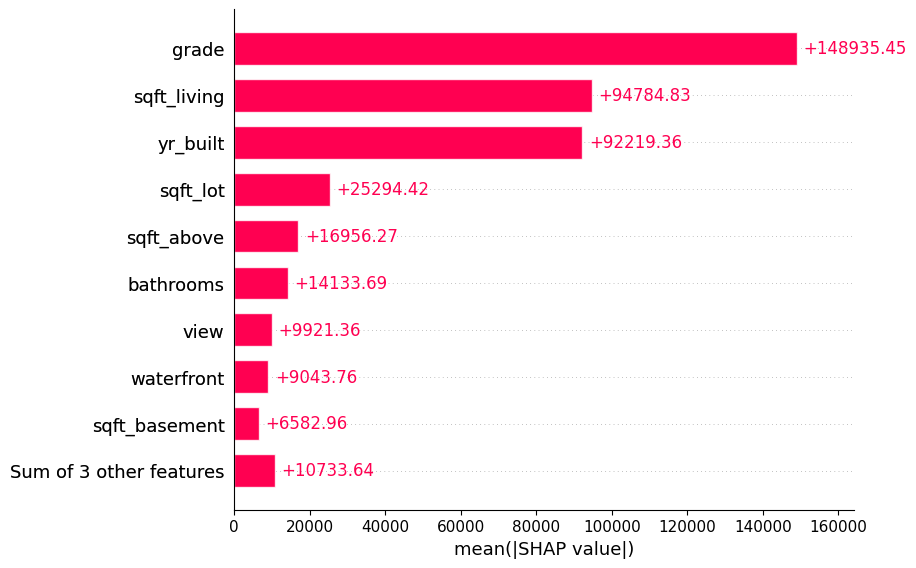

In [35]:
shap.plots.bar(shap_values)

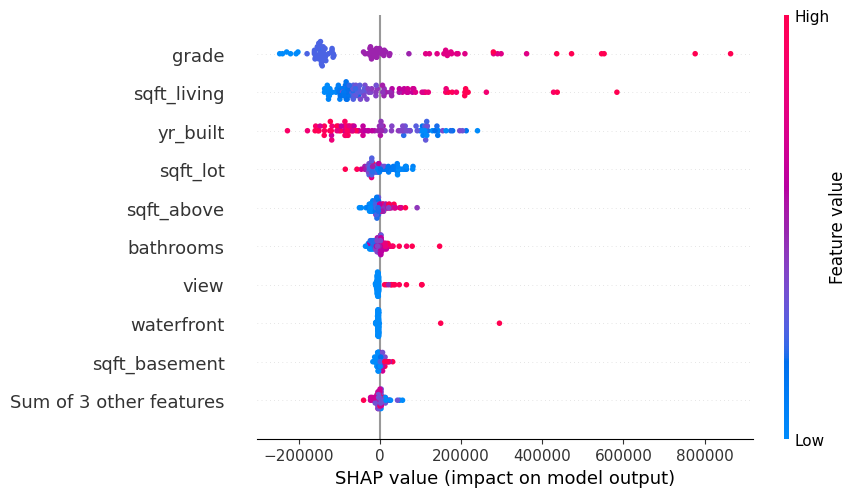

In [36]:
shap.plots.beeswarm(shap_values)

C:\Users\carlo\AppData\Local\Temp\ipykernel_16956\4117389138.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, plot_type='violin')


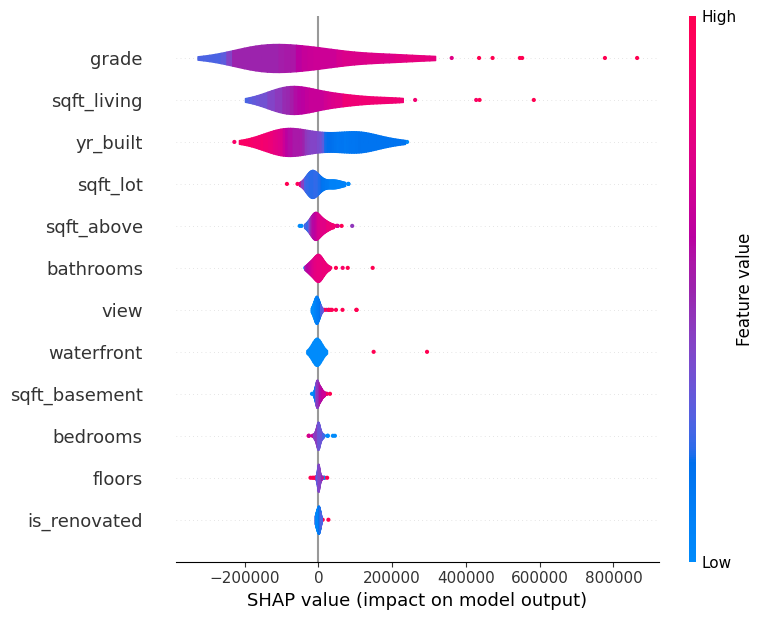

In [37]:
shap.summary_plot(shap_values, plot_type='violin')

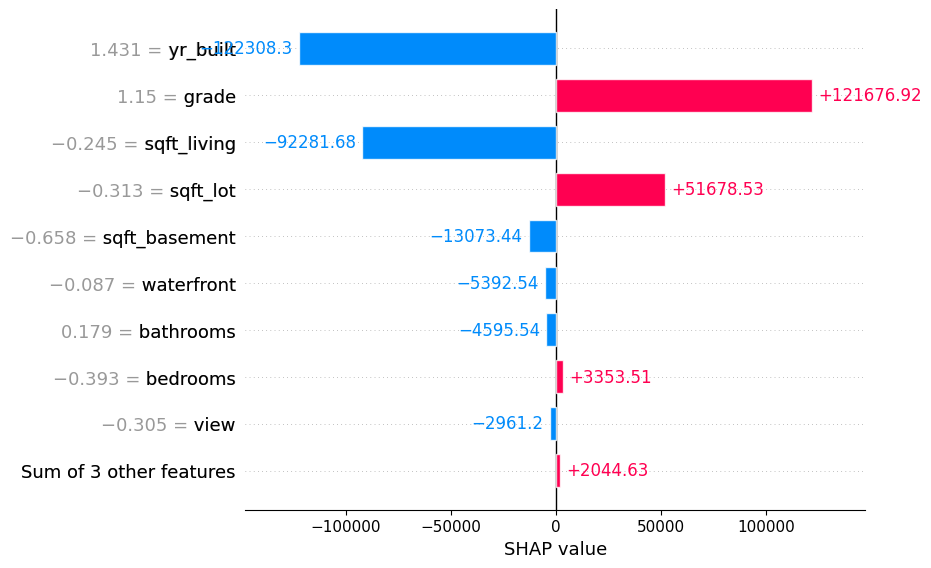

In [38]:
shap.plots.bar(shap_values[0])

In [39]:
X_test.iloc[1518]

bedrooms             3
bathrooms          1.0
sqft_living       1580
sqft_lot          4000
floors             2.0
waterfront           0
view                 0
grade                8
sqft_above        1580
sqft_basement        0
yr_built          1905
is_renovated     False
Name: 13434, dtype: object

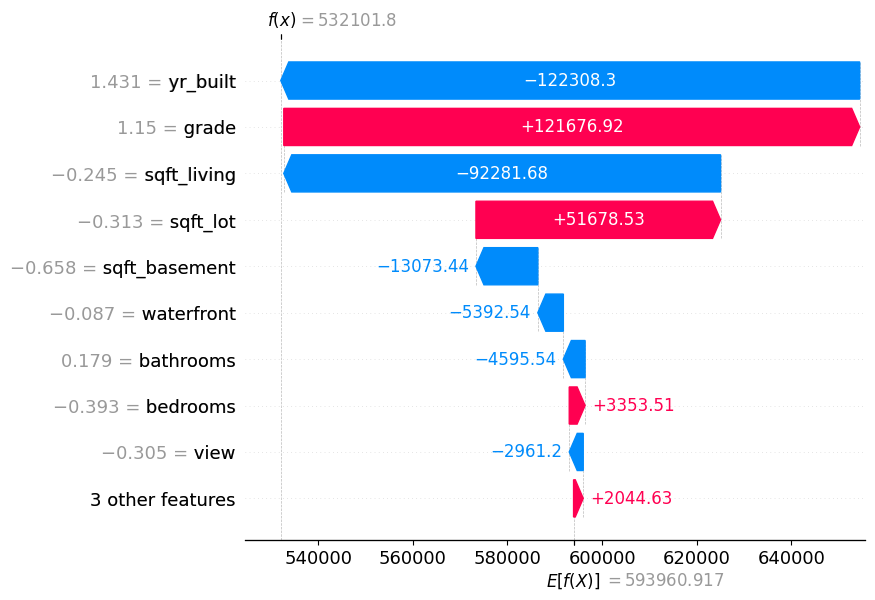

In [40]:
shap.plots.waterfall(shap_values[0])